In [1]:
# useful to autoreload the module without restarting the kernel
%load_ext autoreload
%autoreload 2

In [2]:
from mppi import InputFiles as I, Calculators as C, Utilities as U
import os

In [3]:
omp = 1
mpi_run = 'mpirun -np 8'

# Analysis of the band structure with QuantumESPRESSO

In [4]:
run_dir = 'Pw_bands'

We compute the band structure of Silicon and Gallium arsenide using the tools for QuantumESPRESSO

## Band structure of GaAs

The first step consists in a scf computation 

In [5]:
scf_prefix = 'gaas_scf'
bands_prefix = 'gaas_bands'

In [6]:
inp = I.PwInput(file='IO_files/gaas_scf.in')
inp.set_prefix(scf_prefix)
inp.set_energy_cutoff(60)
inp.set_kpoints(points=[6,6,6])
#inp

In [7]:
code = C.QeCalculator(omp=omp,mpi_run=mpi_run,skip=True)

Initialize a QuantumESPRESSO calculator with OMP_NUM_THREADS=1 and command mpirun -np 8 pw.x


In [8]:
code.run(input=inp,run_dir=run_dir,name=scf_prefix)

Run directory Pw_bands
Skip the computation for input gaas_scf


'Pw_bands/gaas_scf.save/data-file-schema.xml'

Now we perform the bands computation specifying the kpoints on a path. 

To define the path we write the coordinates of the high symmetry points (using the tpiba_b type of
pw) and we make usage of the function build_kpath

In [9]:
G = [0.,0.,0.]
X = [0.,0.,1.]
L = [0.5,0.5,0.5]
W = [1.0,0.5,0.]
K = [0.,1.,1.]

# useful to label the high-sym point on the path
high_sym = {'X':X,'L':L,'G':G,'K':K,'W':W} 

In [10]:
klist = U.build_kpath(L,G,X,K,G,numstep=30)
klist

[[0.5, 0.5, 0.5, 30],
 [0.0, 0.0, 0.0, 30],
 [0.0, 0.0, 1.0, 30],
 [0.0, 1.0, 1.0, 30],
 [0.0, 0.0, 0.0, 0]]

In [11]:
inp.set_bands(8)
inp.set_prefix(bands_prefix)
inp.set_kpoints(type='tpiba_b',path=klist)
#inp

In [12]:
results = code.run(input=inp,run_dir=run_dir,name=bands_prefix,source_dir=os.path.join(run_dir,scf_prefix)+'.save')

The folder Pw_bands/gaas_bands.save already exsists. Source folder Pw_bands/gaas_scf.save not copied
Run directory Pw_bands
Skip the computation for input gaas_bands


Once that the computation is over we can create an instance of PwBands

In [13]:
bands = U.PwBands(results,high_sym)

The class contains some methods that return the bands, the kpath or the position of the high symmetry points on the path

In [14]:
bands.get_high_sym_positions()

(['X', 'L', 'G', 'G', 'K'],
 [1.8660254037844377,
  0.0,
  0.8660254037844385,
  4.28023896615753,
  2.866025403784435])

It contains also a plot method that show the band structure

In [15]:
import matplotlib.pyplot as plt

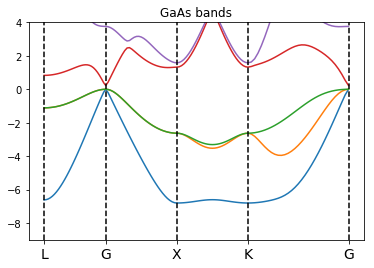

Direct gap system
Gap : 0.22543011132206656 eV


In [16]:
%matplotlib inline
plt.title('GaAs bands')
plt.ylim(-9,4)
bands.plot(plt,selection=[1,2,3,4,5],convert_eV=True)

Once that the computation is over we can create an instance of BandStructure

In [42]:
bands = U.BandStructure.from_PwParser(results,high_sym,set_gap=1.42)

Apply a scissor of 1.1945698886779335 eV


The class contains some methods that return the bands, the kpath or the position of the high symmetry points on the path

In [43]:
bands.get_high_sym_positions()

(['X', 'L', 'G', 'G', 'K'],
 [1.8660254037844377,
  0.0,
  0.8660254037844385,
  4.28023896615753,
  2.866025403784435])

It contains also a plot method that show the band structure

In [44]:
import matplotlib.pyplot as plt

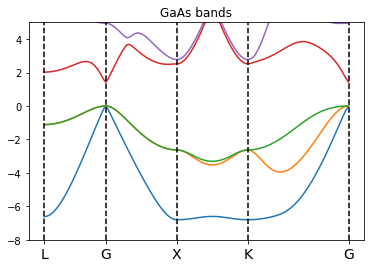

In [45]:
%matplotlib inline
plt.title('GaAs bands')
plt.ylim(-8,5)
bands.plot(plt,selection=[1,2,3,4,5],convert_eV=True)

## Band structure of GaAs with spin-orbit coupling

We repeat the computation of the band structure of GaAs including the spin-orbit. To do so we use a full relativistic pseudopotential
that is able to include the spin-orbit. 

The first step consists in a scf computation 

In [6]:
scf_prefix = 'gaas_scf_so'
nscf_prefix = 'gaas_nscf_so'
bands_prefix = 'gaas_bands_so'

In [8]:
inp = I.PwInput('IO_files/gaas_scf.in')
inp.set_prefix(scf_prefix)
inp.set_energy_cutoff(80)
inp.set_spinorbit()
inp.set_kpoints(points = [6.,6.,6.])
inp.add_atom('Ga','Ga_rel.pz-rrkj3.UPF')
inp.add_atom('As','As_rel.pz-rrkj3.UPF')
inp

{'control': {'verbosity': "'high'",
  'pseudo_dir': "'../pseudos'",
  'calculation': "'scf'",
  'prefix': "'gaas_scf_so'"},
 'system': {'occupations': "'fixed'",
  'ibrav': '2',
  'celldm(1)': '10.677',
  'ntyp': '2',
  'nat': '2',
  'ecutwfc': 80,
  'lspinorb': '.true.',
  'noncolin': '.true.'},
 'electrons': {'conv_thr': '1e-08'},
 'ions': {},
 'cell': {},
 'atomic_species': {'Ga': ['1.0', 'Ga_rel.pz-rrkj3.UPF'],
  'As': ['1.0', 'As_rel.pz-rrkj3.UPF']},
 'atomic_positions': {'type': 'crystal',
  'values': [['Ga', [0.0, 0.0, 0.0]], ['As', [0.25, 0.25, 0.25]]]},
 'kpoints': {'type': 'automatic',
  'values': ([6.0, 6.0, 6.0], [0.0, 0.0, 0.0])},
 'cell_parameters': {},
 'file': 'IO_files/gaas_scf.in'}

In [9]:
code = C.QeCalculator(omp=omp,mpi_run=mpi_run,skip=True)

Initialize a QuantumESPRESSO calculator with OMP_NUM_THREADS=1 and command mpirun -np 8 pw.x


In [10]:
code.run(input=inp,run_dir=run_dir,name=scf_prefix)

Run directory Pw_bands
Executing command: mpirun -np 8 pw.x -inp gaas_scf_so.in > gaas_scf_so.log


'Pw_bands/gaas_scf_so.save/data-file-schema.xml'

Before performing the bands computation we make an nscf computation on a regular kpath, this will be useful for the bands analysis 
using the ypp tools. 

We compute 12 bands since in this case the spin degeneracy is equal to 1 and there 8 occupied bands

In [12]:
inp.set_nscf(12) # due 
inp.set_prefix(nscf_prefix)
#inp

In [14]:
code.run(input=inp,run_dir=run_dir,name=nscf_prefix,source_dir=os.path.join(run_dir,scf_prefix)+'.save')

Copy source_dir Pw_bands/gaas_scf_so.save in the Pw_bands/gaas_nscf_so.save
Run directory Pw_bands
Executing command: mpirun -np 8 pw.x -inp gaas_nscf_so.in > gaas_nscf_so.log


'Pw_bands/gaas_nscf_so.save/data-file-schema.xml'

Now we perform the bands computation specifying the kpoints on a path. 

To define the path we write the coordinates of the high symmetry points (using the tpiba_b type of
pw) and we make usage of the function build_kpath

In [15]:
G = [0.,0.,0.]
X = [0.,0.,1.]
L = [0.5,0.5,0.5]
W = [1.0,0.5,0.]
K = [0.,1.,1.]

# useful to label the high-sym point on the path
high_sym = {'X':X,'L':L,'G':G,'K':K,'W':W} 

In [16]:
klist = U.build_kpath(L,G,X,K,G,numstep=30)
klist

[[0.5, 0.5, 0.5, 30],
 [0.0, 0.0, 0.0, 30],
 [0.0, 0.0, 1.0, 30],
 [0.0, 1.0, 1.0, 30],
 [0.0, 0.0, 0.0, 0]]

In [19]:
inp.set_bands(12)
inp.set_prefix(bands_prefix)
inp.set_kpoints(type='tpiba_b',path=klist)
#inp

In [20]:
results = code.run(input=inp,run_dir=run_dir,name=bands_prefix,source_dir=os.path.join(run_dir,scf_prefix)+'.save')

Copy source_dir Pw_bands/gaas_scf_so.save in the Pw_bands/gaas_bands_so.save
Run directory Pw_bands
Executing command: mpirun -np 8 pw.x -inp gaas_bands_so.in > gaas_bands_so.log


Once that the computation is over we can create an instance of PwBands

In [21]:
bands = U.PwBands(results,high_sym)

The class contains some methods that return the bands, the kpath or the position of the high symmetry points on the path

In [22]:
bands.get_high_sym_positions()

(['X', 'L', 'G', 'G', 'K'],
 [1.8660254037844377,
  0.0,
  0.8660254037844385,
  4.28023896615753,
  2.866025403784435])

It contains also a plot method that show the band structure

In [23]:
import matplotlib.pyplot as plt

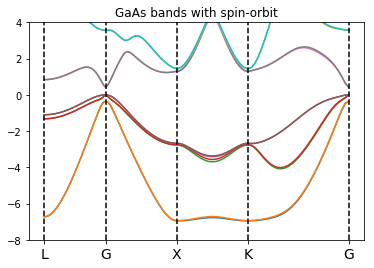

Direct gap system
Gap : 0.41800721919000305 eV


In [36]:
%matplotlib inline
plt.title('GaAs bands with spin-orbit')
plt.ylim(-8,4)
bands.plot(plt,selection=[2,3,4,5,6,7,8,9,10,11],convert_eV=True)

Note that in this case we to display twice the bands respect to the previous example since each band accomodate only one electron in
a specific spin state. 

## Band structure of Silicon

The first step consists in a scf computation 

In [20]:
scf_prefix = 'si_scf'
bands_prefix = 'si_bands'

In [21]:
inp = I.PwInput(file='IO_files/si_scf.in')
inp.set_prefix(scf_prefix)
inp.set_energy_cutoff(60)
inp.set_kpoints(points=[6,6,6])
#inp

In [22]:
code = C.QeCalculator(omp=omp,mpi_run=mpi_run,skip=True)

Initialize a QuantumESPRESSO calculator with OMP_NUM_THREADS=1 and command mpirun -np 8 pw.x


In [23]:
code.run(input=inp,run_dir=run_dir,name=scf_prefix)

Run directory Pw_bands
Skip the computation for input si_scf


'Pw_bands/si_scf.save/data-file-schema.xml'

Now we perform the bands computation specifying the kpoints on a path. 

To define the path we write the coordinates of the high symmetry points (using the tpiba_b type of
pw) and we make usage of the function build_kpath

In [24]:
G = [0.,0.,0.]
X = [0.,0.,1.]
L = [0.5,0.5,0.5]
W = [1.0,0.5,0.]
K = [0.,1.,1.]

# useful to label the high-sym point on the path
high_sym = {'X':X,'L':L,'G':G,'K':K,'W':W} 

In [25]:
from mppi import Utilities as U

In [26]:
klist = U.build_kpath(L,G,X,K,G,numstep=30)
#klist = U.build_kpath(L,G,Xu,B,numstep=30)
klist

[[0.5, 0.5, 0.5, 30],
 [0.0, 0.0, 0.0, 30],
 [0.0, 0.0, 1.0, 30],
 [0.0, 1.0, 1.0, 30],
 [0.0, 0.0, 0.0, 0]]

In [27]:
inp.set_bands(8)
inp.set_prefix(bands_prefix)
inp.set_kpoints(type='tpiba_b',path=klist)
#inp

In [28]:
results = code.run(input=inp,run_dir=run_dir,name=bands_prefix,source_dir=os.path.join(run_dir,scf_prefix)+'.save')

The folder Pw_bands/si_bands.save already exsists. Source folder Pw_bands/si_scf.save not copied
Run directory Pw_bands
Skip the computation for input si_bands


Once that the computation is over we can create an instance of PwBands

In [29]:
bands = U.PwBands(results,high_sym)

The class contains some methods that return the bands, the kpath or the position of the high symmetry points on the path

In [30]:
bands.get_high_sym_positions()

(['X', 'L', 'G', 'G', 'K'],
 [1.8660254037844377,
  0.0,
  0.8660254037844385,
  4.28023896615753,
  2.866025403784435])

It contains also a plot method that show the band structure

In [31]:
import matplotlib.pyplot as plt

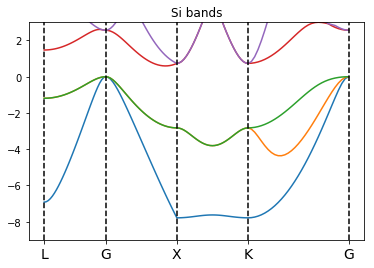

Indirect gap system
Gap : 0.5955556200825423 eV
Direct gap : 2.5651732373482257 eV


In [32]:
%matplotlib inline
plt.title('Si bands')
plt.ylim(-9,3)
bands.plot(plt,selection=[1,2,3,4,5],convert_eV=True)

# Analysis of the band structure with ypp

In [46]:
run_dir = 'Ypp_bands'

Now we analyze the band structure using the post processing tools of ypp. 

As an example we consider the GaAs band structure with spin-orbit coupling. 

We perform a yy -s b computation starting from the .save of an nscf pw computation on a regular grid

In [39]:
U.build_SAVE('Pw_bands/gaas_nscf_so.save',run_dir)

Create folder Ypp_bands
Executing command: cd Pw_bands/gaas_nscf_so.save; p2y -a 2
Executing command: ln -s /home/marco/Applications/MPPI/sphinx_source/tutorials/Pw_bands/gaas_nscf_so.save/SAVE /home/marco/Applications/MPPI/sphinx_source/tutorials/Ypp_bands
Executing command: cd Ypp_bands;OMP_NUM_THREADS=1 yambo


In [53]:
inp = I.YamboInput(args='ypp -s b',folder=run_dir,filename='ypp.in') 
inp

{'args': 'ypp -s b',
 'folder': 'Ypp_bands',
 'filename': 'ypp.in',
 'arguments': [],
 'variables': {'OutputAlat': [0.0, ''],
  'INTERP_Shell_Fac': [20.0, ''],
  'BANDS_steps': [10.0, ''],
  'INTERP_mode': 'NN',
  'cooIn': 'rlu',
  'cooOut': 'rlu',
  'CIRCUIT_E_DB_path': 'none',
  'BANDS_bands': [[1, 12], ''],
  'INTERP_Grid': [['-1', '-1', '-1'], '']}}

In [54]:
code = C.YamboCalculator(mpi_run='mpirun -np 1',executable='ypp',skip=False)

Initialize a Yambo calculator with OMP_NUM_THREADS=1 and command mpirun -np 1 ypp


Set the input parameter to perform the band computation along a path

In [55]:
# set the coordinate of the high-sym points 
G = [0.,0.,0.]
X = [0.,0.,1.]
L = [0.5,0.5,0.5]
W = [1.0,0.5,0.]
K = [0.,1.,1.]
# set the path (use the same path of the pw computation)
path = [L,G,X,K,G]
# set the number of intermediate points between two high-sym ones
bands_step = 30

In [56]:
# scissor
# inp['variables']['GfnQP_E'] = [1.0,1.0,1.0]

# band structure
inp['variables']['BANDS_steps'] = [bands_step,'']
inp['variables']['BANDS_kpts'] = [path,'']
inp['variables']['cooIn'] = 'alat'
inp['variables']['cooOut'] = 'alat'
inp

{'args': 'ypp -s b',
 'folder': 'Ypp_bands',
 'filename': 'ypp.in',
 'arguments': [],
 'variables': {'OutputAlat': [0.0, ''],
  'INTERP_Shell_Fac': [20.0, ''],
  'BANDS_steps': [30, ''],
  'INTERP_mode': 'NN',
  'cooIn': 'alat',
  'cooOut': 'alat',
  'CIRCUIT_E_DB_path': 'none',
  'BANDS_bands': [[1, 12], ''],
  'INTERP_Grid': [['-1', '-1', '-1'], ''],
  'BANDS_kpts': [[[0.5, 0.5, 0.5],
    [0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0],
    [0.0, 1.0, 1.0],
    [0.0, 0.0, 0.0]],
   '']}}

In [57]:
result = code.run(run_dir=run_dir,input=inp,name='gaas_bands_so')
result

Run directory Ypp_bands
Executing command: mpirun -np 1 ypp -F gaas_bands_so.in -J gaas_bands_so -C gaas_bands_so


{'output': ['Ypp_bands/gaas_bands_so/o-gaas_bands_so.magnetization_y',
  'Ypp_bands/gaas_bands_so/o-gaas_bands_so.magnetization_x',
  'Ypp_bands/gaas_bands_so/o-gaas_bands_so.bands_interpolated',
  'Ypp_bands/gaas_bands_so/o-gaas_bands_so.magnetization_z',
  'Ypp_bands/gaas_bands_so/o-gaas_bands_so.spin_factors_DN',
  'Ypp_bands/gaas_bands_so/o-gaas_bands_so.spin_factors_UP'],
 'ndb_folder': 'gaas_bands_so'}

Let's see what the Bands class should do in this case

In [58]:
from mppi import Parsers as P

In [59]:
data = P.YamboParser(result['output'])
data = data['bands_interpolated'] # use this field

The class has to convert this data structure. 

We can define a method that return a structure "eval"
analogous to the one of the pw parser and a list with the coordinates
of the kpoints. Once that this is done the class can manage the band structure
in a unique way both for ypp and pw.

In [79]:
k = data['col0']
b1 = data['col1']
b2 = data['col2']
b3 = data['col3']
b4 = data['col4']
b5 = data['col5']
b6 = data['col6']
b7 = data['col7']
b8 = data['col8']
b9 = data['col9']
b10 = data['col10']
b11 = data['col11']
b12 = data['col12']

(-8, 4)

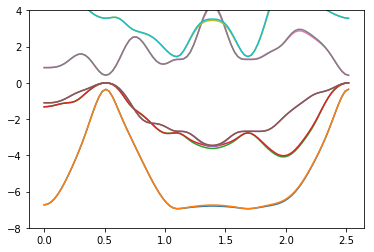

In [80]:
for b in [b3,b4,b5,b6,b7,b8,b9,b10,b11,b12]:
    plt.plot(k,b)
plt.ylim(-8,4)